In [2]:
## Programming homework2 : 비행기 사고 생존 예측
# dataset 만들기
# Survival : 0 - death, 1 - survived
# Class : 1~3
# Gender : female, male
# Age : 5~80

## 0. csv 데이터 읽어오기
import pandas as pd
passenger = pd.read_csv("passenger.csv")

In [3]:
passenger.head(10)

,ID,Survival,Class,Gender,Age
0,1,1,3,male,55
1,2,1,3,male,68
2,3,0,1,female,9
3,4,0,1,female,12
4,5,1,3,female,23
5,6,1,2,male,11
6,7,1,2,male,59
7,8,0,2,male,18
8,9,1,3,female,69
9,10,0,3,male,75


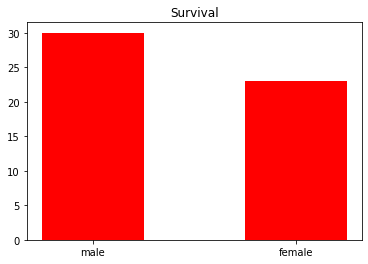

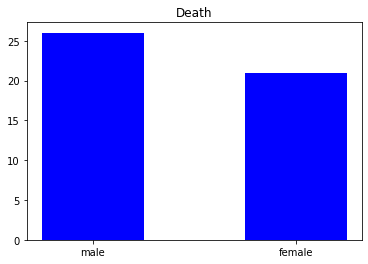

In [4]:
import matplotlib.pyplot as plt
import numpy as np
## 1. Data 특성 알아보기 및 시각화
# 성별 별 생존자 수
survived = passenger[passenger['Survival']==1]['Gender'].value_counts()
death = passenger[passenger['Survival']==0]['Gender'].value_counts()

plt.bar(survived.index, survived,color='r', width = 0.5)
plt.title("Survival")
plt.show()
plt.bar(death.index,death,color='b', width = 0.5)
plt.title("Death")
plt.show()

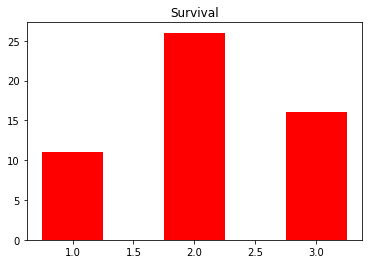

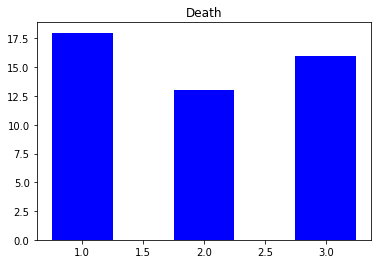

In [5]:
# 클래스 별 생존자 수
survived = passenger[passenger['Survival']==1]['Class'].value_counts()
death = passenger[passenger['Survival']==0]['Class'].value_counts()

plt.bar(survived.index, survived, color='r', width = 0.5)
plt.title("Survival")
plt.show()

plt.bar(death.index,death,color='b', width = 0.5)
plt.title("Death")
plt.show()

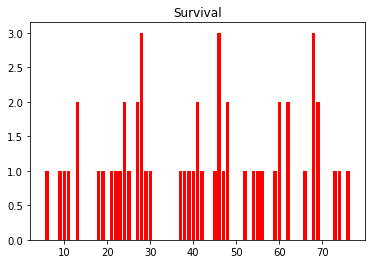

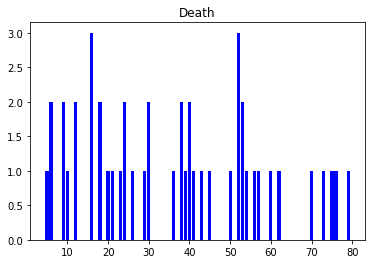

In [6]:
# 나이 별 생존자 수
survived = passenger[passenger['Survival']==1]['Age'].value_counts()
death = passenger[passenger['Survival']==0]['Age'].value_counts()

plt.bar(survived.index, survived, color='r')
plt.title("Survival")
plt.show()

plt.bar(death.index,death,color='b')
plt.title("Death")
plt.show()

In [7]:
## 2. sklearn를 사용하여 로지스틱회귀를 실행하여 생존율 예측 모델을 만들어라
# 성별을 숫자로 mapping
gender_mapping = {"male" : 0, "female" : 1}
passenger["Gender"] = passenger["Gender"].map(gender_mapping)

print(passenger.Gender)

0     0
1     0
2     1
3     1
4     1
     ..
95    0
96    0
97    0
98    0
99    1
Name: Gender, Length: 100, dtype: int64


In [8]:
# 예측 1. 성별에 따른 생존율 예측 모델
X = passenger["Gender"].values.reshape(-1,1)
y = passenger["Survival"]

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

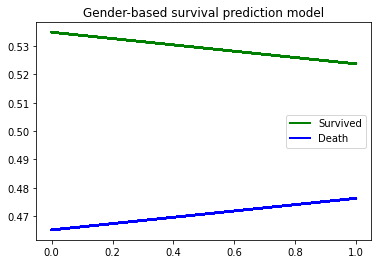

In [9]:
X_new = np.random.randint(0, 2, size=100).reshape(-1,1)
y_survive = log_reg.predict_proba(X_new)

plt.title("Gender-based survival prediction model")
plt.plot(X_new, y_survive[:, 1],"g-",linewidth=2, label="Survived")
plt.plot(X_new, y_survive[:, 0],"b-",linewidth=2, label="Death")
plt.legend()
plt.show()

In [146]:
# 예측 2. 나이에 따른 생존율 예측 모델
X = passenger["Age"].values.reshape(-1,1)
y = passenger["Survival"]

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

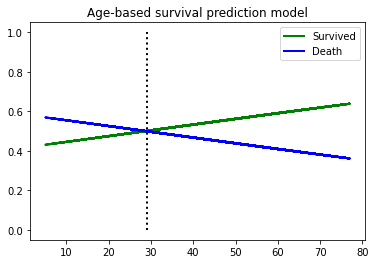

In [169]:
X_new = np.random.randint(5, 80, size= 100).reshape(-1,1)
y_survive = log_reg.predict_proba(X_new)
descision_boundary = X_new[y_survive[:, 1]>=0.5][0]# 양성 클래스일 확률 0.5 이상

plt.title("Age-based survival prediction model")

# 결정 경계 출력
plt.plot([descision_boundary, descision_boundary],[0,1], "k:", linewidth=2)

plt.plot(X_new, y_survive[:, 1],"g-",linewidth=2, label="Survived")
plt.plot(X_new, y_survive[:, 0],"b-",linewidth=2, label="Death")

plt.legend()
plt.show()

In [221]:
# 예측 3. 클래스에 따른 생존율 예측 모델
X = passenger["Class"].values.reshape(-1,1)
y = passenger["Survival"]

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

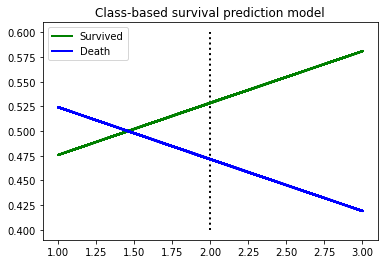

In [229]:
X_new = np.random.randint(1, 4, size=50).reshape(-1,1)
y_survive = log_reg.predict_proba(X_new)
descision_boundary = X_new[y_survive[:, 1]>=0.5][0] # 양성 클래스일 확률 0.5 이상


# 결정 경계 출력
plt.plot([descision_boundary, descision_boundary],[0.4,0.6], "k:", linewidth=2)

plt.title("Class-based survival prediction model")
plt.plot(X_new, y_survive[:, 1],"g-",linewidth=2, label="Survived")
plt.plot(X_new, y_survive[:, 0],"b-",linewidth=2, label="Death")

plt.legend()
plt.show()